In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import time
import os

In [4]:
fp = "res/pan_admbnda_adm3_2020.shp"
data = gpd.read_file(fp)

In [5]:
data.head()

,ADM0_ES,ADM0_PCODE,ADM1_ES,ADM1_PCODE,ADM2_ES,ADM2_PCODE,ADM3_ES,ADM3_PCODE,geometry
0,Panamá,PA,Bocas del Toro,PA01,Bocas del Toro,PA0101,Bastimentos,PA010101,"MULTIPOLYGON (((-82.12486 9.31792, -82.12486 9..."
1,Panamá,PA,Bocas del Toro,PA01,Bocas del Toro,PA0101,Bocas del Toro,PA010102,"MULTIPOLYGON (((-82.24014 9.33764, -82.24014 9..."
2,Panamá,PA,Bocas del Toro,PA01,Bocas del Toro,PA0101,Cauchero,PA010103,"MULTIPOLYGON (((-81.92597 9.21403, -81.92597 9..."
3,Panamá,PA,Bocas del Toro,PA01,Bocas del Toro,PA0101,Punta Laurel,PA010104,"MULTIPOLYGON (((-82.15875 9.15875, -82.15903 9..."
4,Panamá,PA,Bocas del Toro,PA01,Bocas del Toro,PA0101,Tierra Oscura,PA010105,"MULTIPOLYGON (((-82.29014 9.29792, -82.29014 9..."


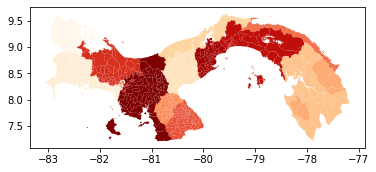

In [8]:
plot = data.plot(column='ADM1_ES', cmap='OrRd')

fig = plot.get_figure()

In [9]:
df = pd.read_csv('res/data.csv')

df.head()

,CORREGIMIENTO,DISTRITO,Sem 11,Sem 12,Sem 13,Sem 14,Sem 15,Sem 16,Sem 17,Sem 18,Sem 19,Sem 20,Sem 21,Sem 22,Sem 23,Sem 24
0,24 DE diciembre,PANAMA,0,1,16,40,90,143,207,247,286,336,368,468,595,725
1,AGUA FRIA,SANTA FE,0,0,0,0,0,1,1,1,2,2,2,2,2,2
2,AGUADULCE,AGUADULCE,0,0,2,4,4,4,6,6,7,8,8,8,12,13
3,AILIGANDI,GUNA YALA,0,0,1,3,11,18,50,94,100,101,101,101,101,101
4,ALANJE,ALANJE,0,0,0,2,2,2,2,2,2,2,2,4,7,7


In [10]:
df["CORREGIMIENTO"]=df["CORREGIMIENTO"].str.lower()
df["DISTRITO"]=df["DISTRITO"].str.lower()

In [11]:
data["ADM3_ES"]=data["ADM3_ES"].str.lower()
data["ADM2_ES"]=data["ADM2_ES"].str.lower()

In [12]:
df.head()

,CORREGIMIENTO,DISTRITO,Sem 11,Sem 12,Sem 13,Sem 14,Sem 15,Sem 16,Sem 17,Sem 18,Sem 19,Sem 20,Sem 21,Sem 22,Sem 23,Sem 24
0,24 de diciembre,panama,0,1,16,40,90,143,207,247,286,336,368,468,595,725
1,agua fria,santa fe,0,0,0,0,0,1,1,1,2,2,2,2,2,2
2,aguadulce,aguadulce,0,0,2,4,4,4,6,6,7,8,8,8,12,13
3,ailigandi,guna yala,0,0,1,3,11,18,50,94,100,101,101,101,101,101
4,alanje,alanje,0,0,0,2,2,2,2,2,2,2,2,4,7,7


In [13]:
len(data)

594

In [14]:
len(df)

314

In [25]:
df.rename(columns={df.columns[0]:'ADM3_ES'}, inplace=True)
df.rename(columns={df.columns[1]:'ADM2_ES'}, inplace=True)

In [16]:
data['ADM3_ES']=data['ADM3_ES'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

In [26]:
df_merged=pd.merge(data, df, on='ADM3_ES', how='left').fillna('0')

In [27]:
df_merged.head()

,ADM0_ES,ADM0_PCODE,ADM1_ES,ADM1_PCODE,ADM2_ES_x,ADM2_PCODE,ADM3_ES,ADM3_PCODE,geometry,ADM2_ES_y,...,Sem 15,Sem 16,Sem 17,Sem 18,Sem 19,Sem 20,Sem 21,Sem 22,Sem 23,Sem 24
0,Panamá,PA,Bocas del Toro,PA01,bocas del toro,PA0101,bastimentos,PA010101,"MULTIPOLYGON (((-82.12486 9.31792, -82.12486 9...",0,...,0,0,0,0,0,0,0,0,0,0
1,Panamá,PA,Bocas del Toro,PA01,bocas del toro,PA0101,bocas del toro,PA010102,"MULTIPOLYGON (((-82.24014 9.33764, -82.24014 9...",bocas del toro,...,0,0,0,0,0,0,0,2,14,23
2,Panamá,PA,Bocas del Toro,PA01,bocas del toro,PA0101,cauchero,PA010103,"MULTIPOLYGON (((-81.92597 9.21403, -81.92597 9...",0,...,0,0,0,0,0,0,0,0,0,0
3,Panamá,PA,Bocas del Toro,PA01,bocas del toro,PA0101,punta laurel,PA010104,"MULTIPOLYGON (((-82.15875 9.15875, -82.15903 9...",0,...,0,0,0,0,0,0,0,0,0,0
4,Panamá,PA,Bocas del Toro,PA01,bocas del toro,PA0101,tierra oscura,PA010105,"MULTIPOLYGON (((-82.29014 9.29792, -82.29014 9...",0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
for i in range(11,25):
    sem='Sem '+str(i)
    df_merged[sem]= pd.to_numeric(df_merged[sem])


In [58]:
df_merged['Sem 11'].describe()

count    598.000000
mean       0.090301
std        0.605839
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Sem 11, dtype: float64

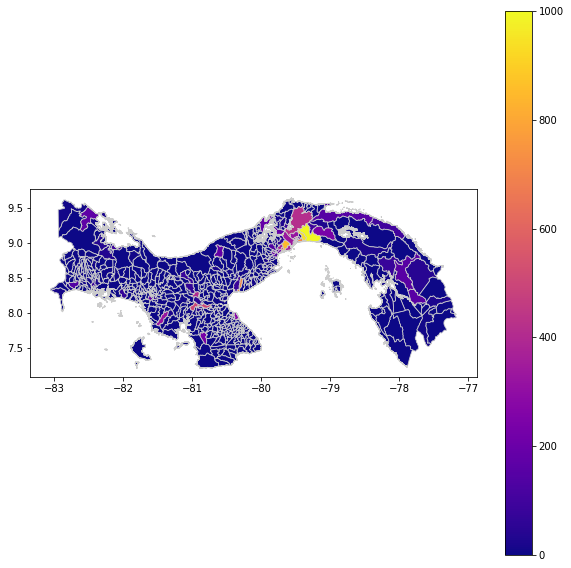

In [49]:
 fig = df_merged.plot(column='Sem 24', cmap='plasma', figsize=(10,10), linewidth=0.8, edgecolor='0.8', vmin=vmin, vmax=vmax, 
                       legend=True, norm=plt.Normalize(vmin=vmin, vmax=vmax))

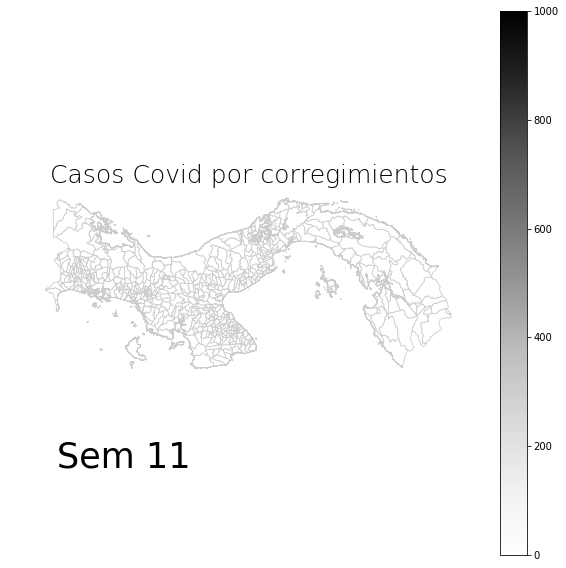

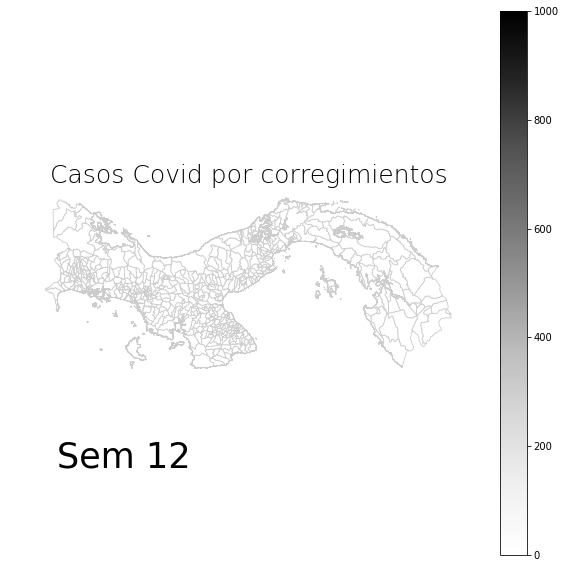

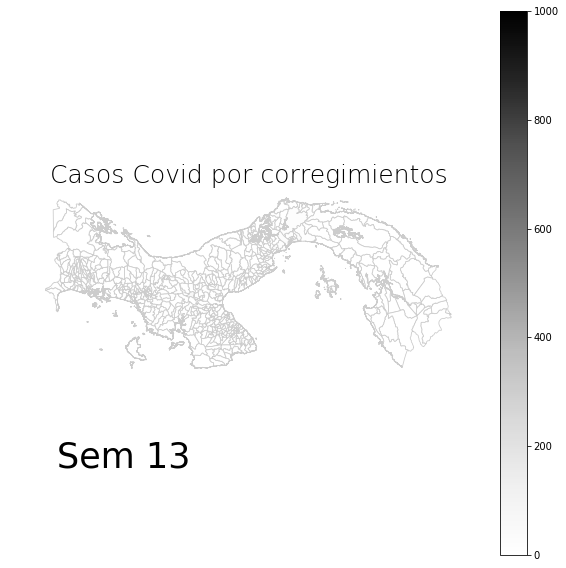

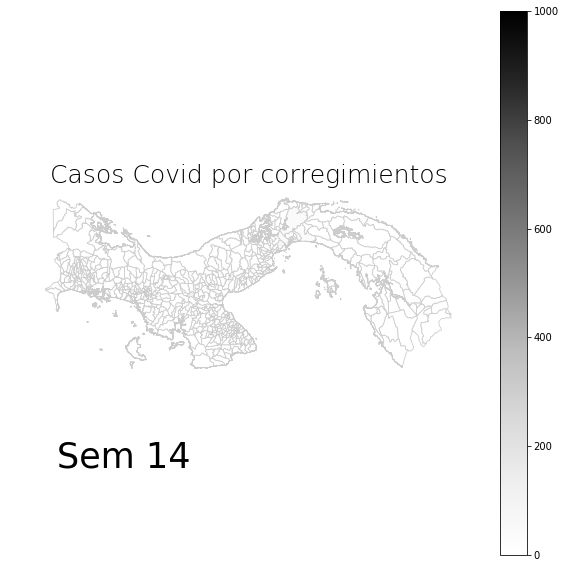

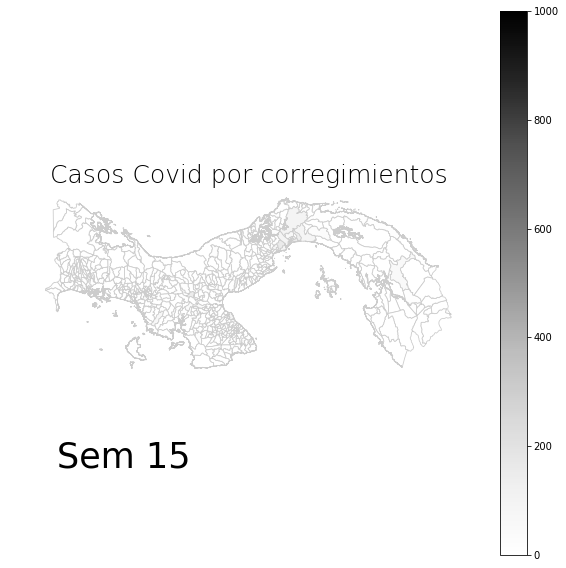

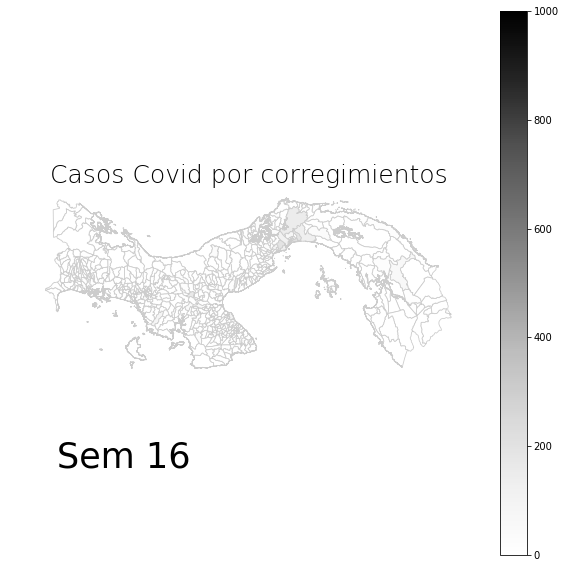

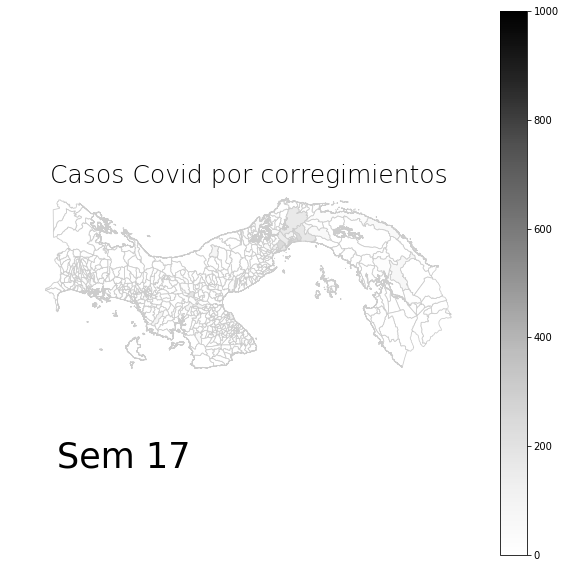

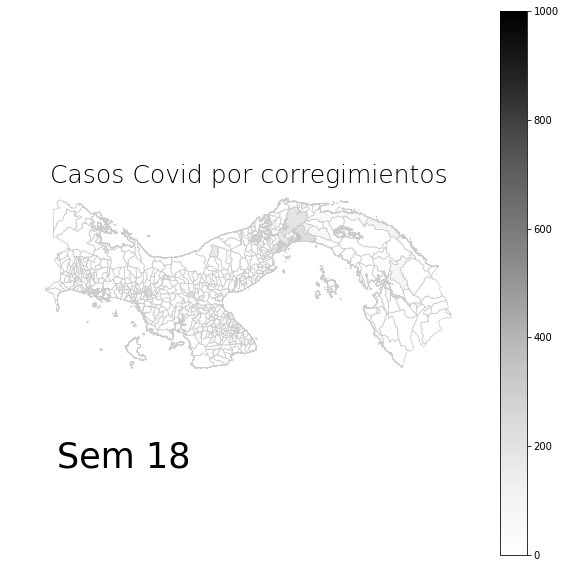

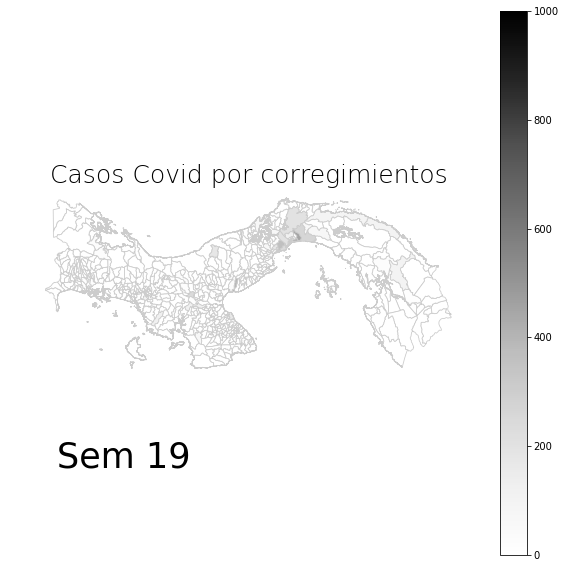

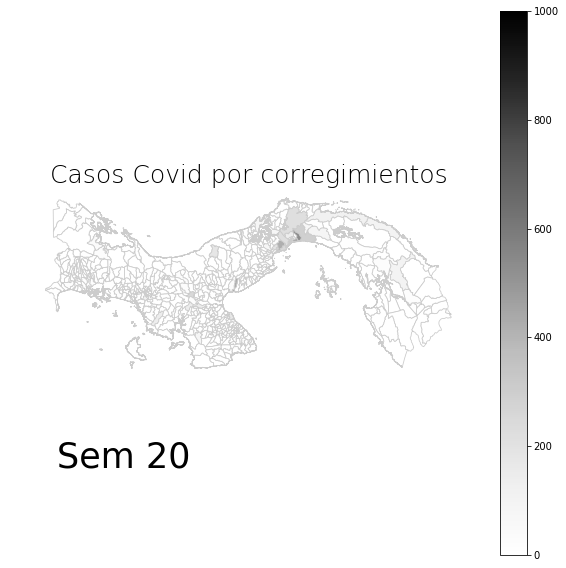

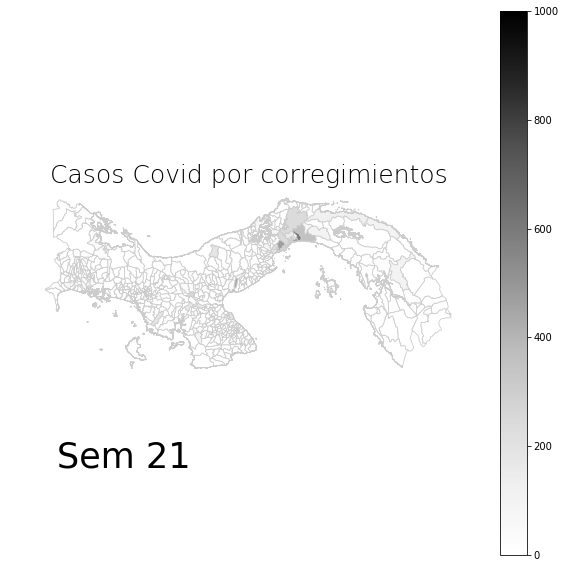

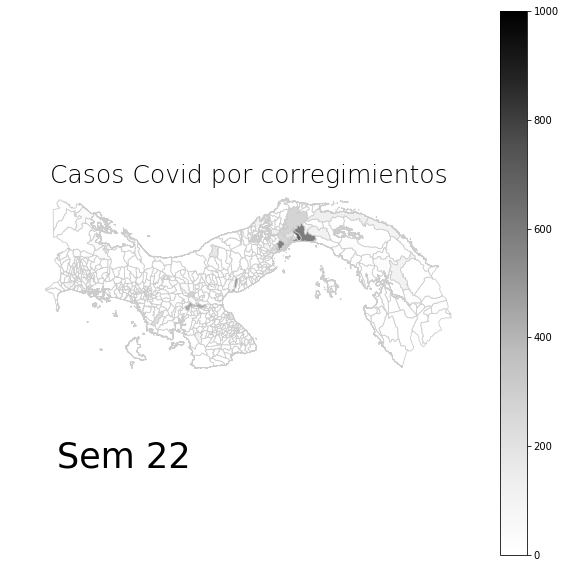

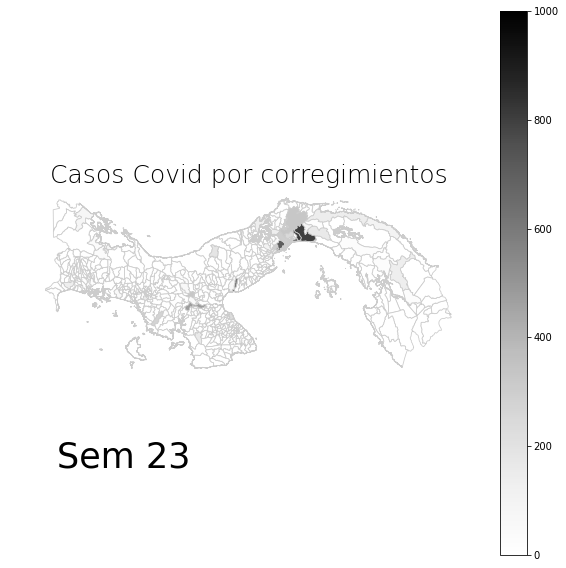

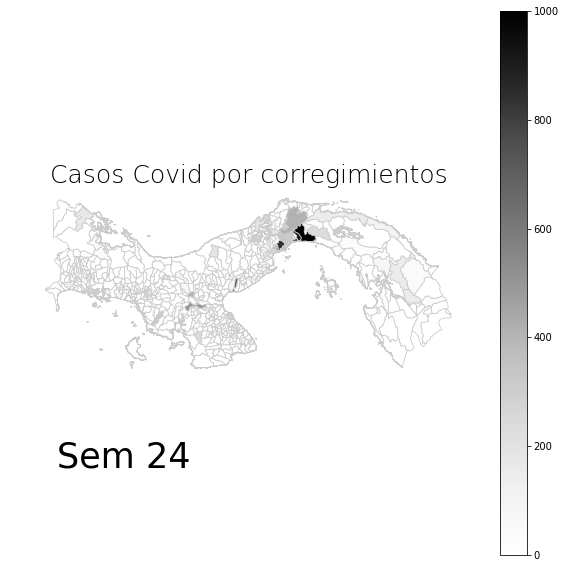

In [60]:
output_path = 'output/maps'

weeks = ['Sem 11','Sem 12','Sem 13','Sem 14','Sem 15','Sem 16','Sem 17','Sem 18','Sem 19','Sem 20','Sem 21','Sem 22','Sem 23','Sem 24']

vmin, vmax = 0, 1000

for week in weeks:
    
    # create map
    fig = df_merged.plot(column=week, cmap='Greys', figsize=(10,10), linewidth=0.8, edgecolor='0.8', vmin=vmin, vmax=vmax, 
                       legend=True, norm=plt.Normalize(vmin=vmin, vmax=vmax)) # UDPATE: added plt.Normalize to keep the legend range the same for all maps
    
    # remove axis of chart
    fig.axis('off')
    
    # add a title
    fig.set_title('Casos Covid por corregimientos', \
              fontdict={'fontsize': '25',
                         'fontweight' : '3'})
    
    # create an annotation for the year
    
    
    # position the annotation to the bottom left
    fig.annotate(week,
            xy=(0.1, .225), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=35)
    
    # this will save the figure as a high-res png in the output path. you can also save as svg if you prefer.
    filepath = os.path.join(output_path, week+'_covid.png')
    chart = fig.get_figure()
    chart.savefig(filepath, dpi=300)